Control Actions:
V: 0.5
omega: 0.9712388980384691


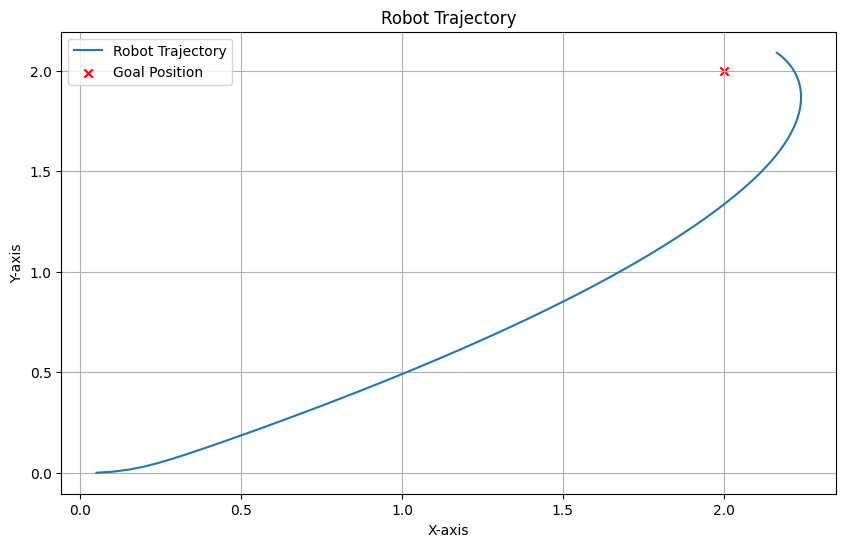

In [1]:
#Ques - 02: Pose Stabalization Full Ques in Assignment Copy
import typing as T
import numpy as np
from utils import wrapToPi

# command zero velocities once we are this close to the goal
RHO_THRES = 0.05
ALPHA_THRES = 0.1
DELTA_THRES = 0.1

class PoseController:
    """ Pose stabilization controller """
    def __init__(self, k1: float, k2: float, k3: float,
                 V_max: float = 0.5, om_max: float = 1) -> None:
        self.k1 = k1
        self.k2 = k2
        self.k3 = k3

        self.V_max = V_max
        self.om_max = om_max

        self.x_g = 0.0
        self.y_g = 0.0
        self.th_g = 0.0

    def load_goal(self, x_g: float, y_g: float, th_g: float) -> None:
        """ Loads in a new goal position """
        self.x_g = x_g
        self.y_g = y_g
        self.th_g = th_g

    def compute_control(self, x: float, y: float, th: float, t: float) -> T.Tuple[float, float]:
        """
        Inputs:
            x, y, th: Current state
            t: Current time (you shouldn't need to use this)
        Outputs:
            V, om: Control actions

        Hints: You'll need to use the wrapToPi function. The np.sinc function
        may also be useful, look up its documentation
        """
        ########## Code starts here ##########
        # Calculate errors
        dx = self.x_g - x
        dy = self.y_g - y
        dtheta = wrapToPi(self.th_g - th)

        # Control law
        rho = np.sqrt(dx**2 + dy**2)
        alpha = wrapToPi(np.arctan2(dy, dx) - th)
        delta = wrapToPi(alpha - th)

        V = self.k1 * rho * np.cos(alpha)
        om = self.k2 * alpha + self.k1 * np.sinc(alpha/np.pi) * np.cos(alpha) * delta + self.k3 * delta

        ########## Code ends here ##########

        # apply control limits
        V = np.clip(V, -self.V_max, self.V_max)
        om = np.clip(om, -self.om_max, self.om_max)

        return V, om

# Output
# Create an instance of PoseController
controller = PoseController(k1=1.0, k2=0.5, k3=0.1, V_max=0.5, om_max=1.0)

# Set a goal
controller.load_goal(x_g=2.0, y_g=2.0, th_g=0.0)

# Example current state
x_current = 0.0
y_current = 0.0
th_current = 0.0
t_current = 0.0

# Compute control actions
V_control, om_control = controller.compute_control(x_current, y_current, th_current, t_current)

# Display the results
print("Control Actions:")
print(f"V: {V_control}")
print(f"omega: {om_control}")


# Output as Graph
import matplotlib.pyplot as plt

# Function to simulate the robot's movement and plot the trajectory
def simulate_and_plot(controller, initial_state, total_time, dt=0.1):
    times = np.arange(0, total_time, dt)
    states = np.zeros((len(times), 3))
    controls = np.zeros((len(times), 2))

    state = np.array(initial_state)

    for i, t in enumerate(times):
        V, om = controller.compute_control(*state, t)
        state += np.array([V * np.cos(state[2]), V * np.sin(state[2]), om]) * dt

        states[i, :] = state
        controls[i, :] = [V, om]

    # Plotting the trajectory
    plt.figure(figsize=(10, 6))
    plt.plot(states[:, 0], states[:, 1], label='Robot Trajectory')
    plt.scatter(controller.x_g, controller.y_g, color='red', marker='x', label='Goal Position')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Robot Trajectory')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set initial state
initial_state = [0.0, 0.0, 0.0]

# Create an instance of PoseController (replace k1, k2, k3 with actual values)
controller = PoseController(k1=1.0, k2=1.0, k3=1.0)

# Set the goal position
controller.load_goal(2.0, 2.0, 0.0)

# Simulate and plot the trajectory for 10 seconds
simulate_and_plot(controller, initial_state, total_time=10.0, dt=0.1)




In [ ]:
# Only the main code of Ques 04: Describe step by step (in words) the A* grid-based search algorithm. What are cons of this method?
open = []
closed = []

# Add the starting node to the open list
open.append(start)

while open:
    # Find the node with the least f value in the open list
    current = min(open, key=lambda node: node.f)

    # Remove current from the open list
    open.remove(current)

    # Add current to the closed list
    closed.append(current)

    # Check if the current node is the goal state
    if current == goal:
        # Reconstruct the path from the start node to the goal node
        path = []
        while current:
            path.append(current)
            current = current.parent
        path.reverse()
        return path

    # Generate all possible successors of current
    successors = generate_successors(current)

    for successor in successors:
        # Calculate the g value
        successor.g = current.g + distance(current, successor)

        # Calculate the h value (using the Manhattan heuristic)
        successor.h = manhattan_distance(successor, goal)

        # Calculate the f value
        successor.f = successor.g + successor.h

        # Check if a node with the same position as successor is already in the open list
        # and has a lower f value
        if successor in open and successor.f < successor.f:
            continue

        # Check if a node with the same position as successor is already in the closed list
        # and has a lower f value
        if successor in closed and successor.f < successor.f:
            continue

        # Add successor to the open list
        open.append(successor)

# In Words
'''
1. Initialization:

Create two empty lists: open and closed.
Add the starting node to the open list. Set its g value to 0 and its h value to the estimated distance to the goal using a heuristic function (e.g., Manhattan distance). The f value, which is the sum of g and h, represents the estimated total cost to reach the goal from the current node.
2. Exploration and Path Building:

While the open list is not empty:
a. Select the Best Node:
Find the node with the lowest f value in the open list. This node is considered the most promising candidate for reaching the goal.
b. Expand and Evaluate Successors:
Remove the selected node from the open list and add it to the closed list.
Generate all possible successors of the selected node. These successors represent the potential next steps in the path towards the goal.
For each successor:
Calculate the g value, which is the cost of reaching the successor from the starting node. This is typically the distance between the successor and its parent node.
Calculate the h value, which is an estimate of the cost of reaching the goal state from the successor. This can be done using various heuristic functions (e.g., Manhattan distance, Euclidean distance).
Calculate the f value, which is the sum of g and h.
Check if a node with the same position as the successor is already in the open list and has a lower f value. If so, skip this successor, as there is a more promising path available.
Check if a node with the same position as the successor is already in the closedlist and has a lowerf` value. If so, skip this successor, as this path has already been explored and found to be less efficient.
If neither of the above conditions is met, add the successor to the open list.
3. Goal Reached or Exhausted:

If the goal node is found (i.e., a node with the same position as the goal is in the open or closed list), retrace the path from the goal node back to the starting node by following the parent pointers of each node. This is the shortest path from the start to the goal.
If the open list is empty, the algorithm has explored all possible paths without finding the goal. The goal is either unreachable or the heuristic function is not accurate enough.
'''

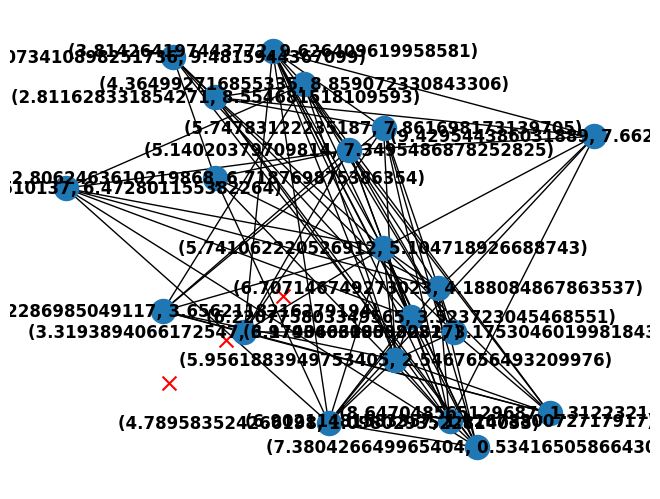

"\nCons of Probabilistic Roadmap (PRM) method:\n1) Computational Complexity:\nTime complexity of building the roadmap is influenced by factors such as the number of nodes, number of neighbors, and collision checking computations.\n\n2) Memory Requirements:\nRoadmap can be substantial, particularly in environments with a large number of nodes which may limit the applicability of PRM\n\n3) Sensitivity to Parameters:\nPRM performance can be sensitive to the choice of parameters, such as the number of sampled nodes, the connection radius, and the number of neighbors to connect. Selecting appropriate parameters may require experimentation and tuning.\n\n4) Not Guaranteed to Find a Solution\n5) Lack of Optimality: May not necessarily find the shortest or most efficient path between the start and goal configurations. Additional post-processing, such as path smoothing, may be needed to improve path quality.\n6) Dependency on Collision Checking Accuracy:If the collision checking is not precise,

In [4]:
# Only the main code of Ques 05: Describe step by step (in words) the Probabilis3c Road Map (PRM) sampling-based mo3on planning
# method. What are the cons of this method?
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# This function generates a random configuration (2D point) within the given space_size.
def generate_random_configuration(space_size):
    return np.random.rand(2) * space_size

# This function checks if a given configuration q is collision-free with respect to a list of obstacles. It returns True if the distance from q to all obstacles is greater than 0.1.
def is_collision_free(q, obstacles):
    return all(np.linalg.norm(q - obstacle) > 0.1 for obstacle in obstacles)

''' PRM START '''
# This function builds the PRM. It initializes an empty graph G using the networkx library.
def build_prm(space_size, num_nodes, num_neighbors, obstacles):
    G = nx.Graph()
# This loop generates num_nodes random configurations, checks if they are collision-free, and adds them as nodes to the graph G.
    for _ in range(num_nodes):
        q = generate_random_configuration(space_size)
        if is_collision_free(q, obstacles):
            G.add_node(tuple(q), config=q)
# This nested loop connects nodes in the graph by adding edges between them if they are collision-free and within a certain distance (0.1 in this case).
    for node1 in G.nodes():
        for node2 in random.sample(list(G.nodes()), min(num_neighbors, len(G.nodes()))):
            if node1 != node2 and is_collision_free(np.array(node1), obstacles) and is_collision_free(np.array(node2), obstacles):
                G.add_edge(node1, node2)
    return G
''' PRM END '''


# This function plots the PRM graph using matplotlib and positions the nodes based on their configurations.
def plot_prm(G, obstacles):
    pos = {tuple(config): config for config in G.nodes()}
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

    for obstacle in obstacles:
        plt.scatter(obstacle[0], obstacle[1], color='red', marker='x', s=100)

    plt.show()

def main():
    space_size = 10
    num_nodes = 20
    num_neighbors = 5
    obstacles = np.array([[2, 2], [3, 3], [4, 4]])

    prm = build_prm(space_size, num_nodes, num_neighbors, obstacles)
    plot_prm(prm, obstacles)

if __name__ == "__main__":
    main()

'''
Cons of Probabilistic Roadmap (PRM) method:
1) Computational Complexity:
Time complexity of building the roadmap is influenced by factors such as the number of nodes, number of neighbors, and collision checking computations.

2) Memory Requirements:
Roadmap can be substantial, particularly in environments with a large number of nodes which may limit the applicability of PRM

3) Sensitivity to Parameters:
PRM performance can be sensitive to the choice of parameters, such as the number of sampled nodes, the connection radius, and the number of neighbors to connect. Selecting appropriate parameters may require experimentation and tuning.

4) Not Guaranteed to Find a Solution
5) Lack of Optimality: May not necessarily find the shortest or most efficient path between the start and goal configurations. Additional post-processing, such as path smoothing, may be needed to improve path quality.
6) Dependency on Collision Checking Accuracy:If the collision checking is not precise, the algorithm may produce paths that collide with obstacles. Achieving accurate collision checking may require sophisticated methods and can contribute to increased computational costs.
7) Difficulty Handling Narrow Passages:Algorithm relies on random sampling, and there's a chance that the randomly generated configurations do not adequately explore such challenging areas.
8) Static Roadmap: PRM constructs a roadmap based on a snapshot of the environment, assuming it is static. If the environment changes dynamically, the pre-built roadmap may become obsolete, and the robot may need to rebuild the roadmap in real-time.
'''

Path: [[1, 1], array([1.1849622 , 1.46453093]), array([1.14142113, 1.96263149]), array([1.2928247 , 2.43915742]), array([1.52121818, 2.88394548]), array([1.54742606, 3.38325815]), array([1.9153672, 3.7218129]), array([2.38660117, 3.88896118]), array([2.88391884, 3.83723949]), array([3.25281921, 4.17474878]), array([3.7453891 , 4.08887153]), array([4.05626205, 3.69726201]), array([4.53994206, 3.82396498]), array([4.68191229, 4.30338594]), array([4.82428265, 4.78268822]), array([5.06974301, 5.21829035]), array([5.05241945, 5.71799015]), array([5.09738883, 6.2159638 ]), array([5.0391366 , 6.71255888]), array([5.4769235 , 6.95410108]), array([5.22148883, 7.12957281])]


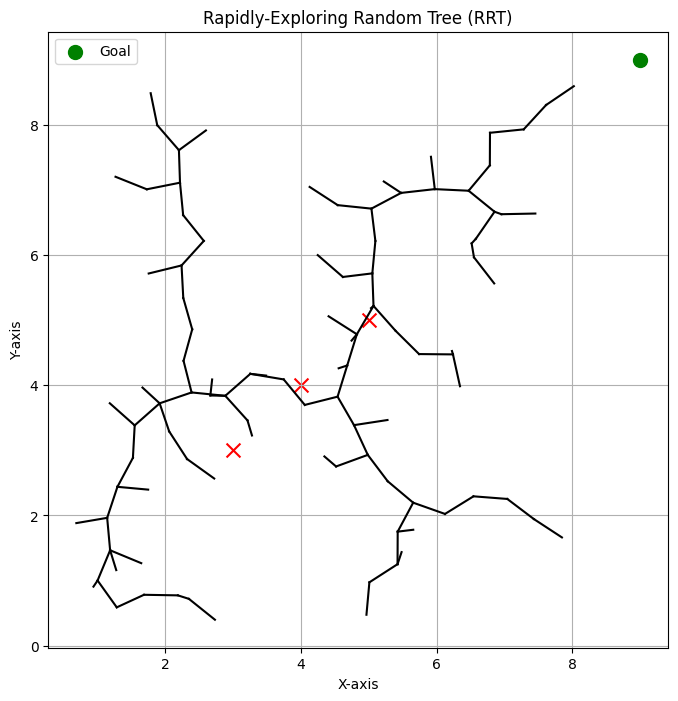

'\n1) Non-Optimal Paths: The randomness in the tree expansion process can lead to suboptimal paths, especially in scenarios where a more structured approach might find a shorter path.\n2) Sensitivity to Parameters: Sensitive to the choice of parameters such as step size, the number of nodes, and exploration strategy.\n3) Difficulty in Narrow Spaces: Random nature of the tree expansion may lead to nodes being placed in less informative areas of the configuration space.\n4) Limited Exploration in High-Dimensional Spaces: due to the "curse of dimensionality." making it challenging to find valid paths.\n5) Vulnerability to Local Minima: The randomness may not always lead the tree towards unexplored or more promising regions.\n6) Lack of Guarantee for Completeness: The algorithm\'s success depends on random sampling and the probability of reaching the goal configuration.\n7) Dependency on Steering Function: The steering function should be carefully designed to balance exploration and exploi

In [6]:
# Only the main code of Ques 06: Describe step by step (in words) theRapidly-exploring Random Tree (RRT) sampling-based motion planning
# method. What are the cons of this method?
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state):
        self.state = state
        self.parent = None

def generate_random_configuration(space_size):
    return np.random.rand(2) * space_size

def find_nearest_node(tree, q):
    # Find the nearest node in the tree to the given configuration q
    distances = [np.linalg.norm(np.array(node.state) - q) for node in tree]
    nearest_node_index = np.argmin(distances)
    return tree[nearest_node_index]

def is_collision_free(q, obstacles):
    # Check if a configuration q is collision-free with respect to the obstacles
    for obstacle in obstacles:
        if np.linalg.norm(q - obstacle) < 0.1:
            return False  # Collision
    return True  # Collision-free

def extend_tree(t, q, step_size, obstacles):
    # Extend the tree towards the random configuration q
    nearest_node = find_nearest_node(t, q)
    direction = np.array(q) - np.array(nearest_node.state)
    distance = np.linalg.norm(direction)
    if distance > step_size:
        direction = (direction / distance) * step_size

    new_state = np.array(nearest_node.state) + direction

    if is_collision_free(new_state, obstacles):
        new_node = Node(new_state)
        new_node.parent = nearest_node
        t.append(new_node)
        return True
    return False

def rrt(start, goal, space_size, num_nodes, step_size, obstacles):
    # Initialize the tree with the start node
    tree = [Node(start)]

    for _ in range(num_nodes):
        q = generate_random_configuration(space_size)

        # Extend the tree towards the random configuration q
        extended = extend_tree(tree, q, step_size, obstacles)

        # Check if the goal is reached
        if np.linalg.norm(np.array(tree[-1].state) - goal) < step_size:
            goal_node = Node(goal)
            goal_node.parent = tree[-1]
            tree.append(goal_node)
            return tree

    return tree

def extract_path(tree):
    # Extract the path from the tree by backtracking from the goal node to the start node
    path = []
    current_node = tree[-1]
    while current_node is not None:
        path.append(current_node.state)
        current_node = current_node.parent
    return path[::-1]

def plot_rrt(tree, goal, obstacles):
    # Plot the RRT graph
    plt.figure(figsize=(8, 8))
    for node in tree:
        if node.parent is not None:
            plt.plot([node.parent.state[0], node.state[0]], [node.parent.state[1], node.state[1]], color='black')

    # Plot the goal
    plt.scatter(goal[0], goal[1], color='green', marker='o', s=100, label='Goal')

    # Plot the obstacles
    for obstacle in obstacles:
        plt.scatter(obstacle[0], obstacle[1], color='red', marker='x', s=100)

    plt.title('Rapidly-Exploring Random Tree (RRT)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    start = [1, 1]
    goal = [9, 9]
    space_size = 10
    num_nodes = 100
    step_size = 0.5
    obstacles = np.array([[3, 3], [4, 4], [5, 5]])

    # Run RRT algorithm
    tree = rrt(start, goal, space_size, num_nodes, step_size, obstacles)

    # Extract and print the path
    path = extract_path(tree)
    print("Path:", path)

    # Plot the RRT graph
    plot_rrt(tree, goal, obstacles)

if __name__ == "__main__":
    main()


'''
1) Non-Optimal Paths: The randomness in the tree expansion process can lead to suboptimal paths, especially in scenarios where a more structured approach might find a shorter path.
2) Sensitivity to Parameters: Sensitive to the choice of parameters such as step size, the number of nodes, and exploration strategy.
3) Difficulty in Narrow Spaces: Random nature of the tree expansion may lead to nodes being placed in less informative areas of the configuration space.
4) Limited Exploration in High-Dimensional Spaces: due to the "curse of dimensionality." making it challenging to find valid paths.
5) Vulnerability to Local Minima: The randomness may not always lead the tree towards unexplored or more promising regions.
6) Lack of Guarantee for Completeness: The algorithm's success depends on random sampling and the probability of reaching the goal configuration.
7) Dependency on Steering Function: The steering function should be carefully designed to balance exploration and exploitation.
8) Difficulty Handling Dynamic Environments: Adapting the algorithm to handle dynamic environments or changes in obstacle configurations may require additional considerations and modifications.
'''


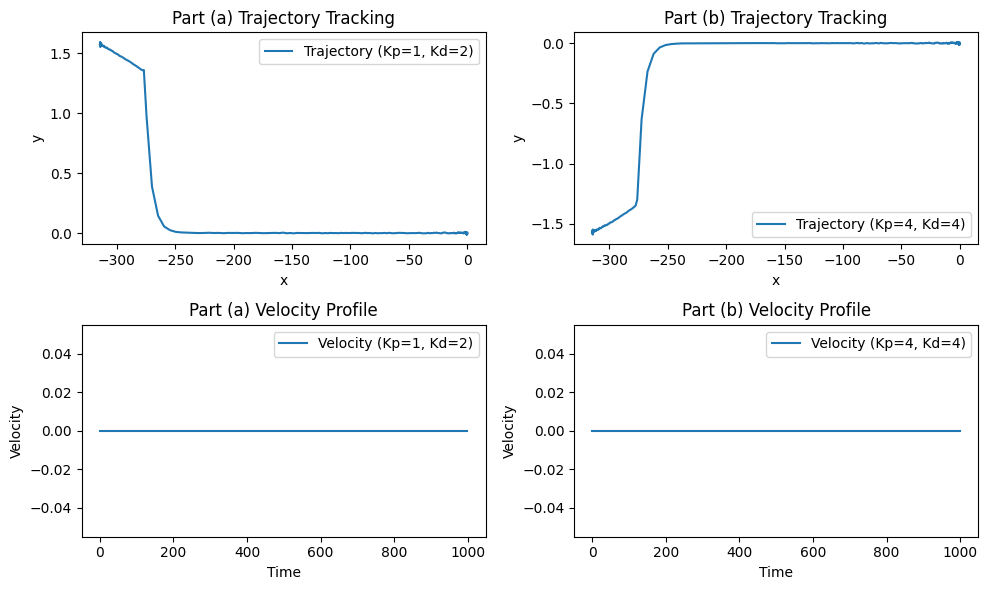

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the extended unicycle model equations
def unicycle_model(x, u):
    v, theta, a, w = x
    v_dot = a
    theta_dot = w
    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    return np.array([x_dot, y_dot, v_dot, theta_dot])

# Closed-loop controller with proportional and derivative gains
def controller(x, xd, Kp, Kd):
    return Kp * (xd - x) - Kd * x

# Simulation parameters
dt = 0.01  # time step
T = 10     # total simulation time
N = int(T / dt)  # number of steps

# Initial conditions
x0 = np.array([0, 0, 0, 0])  # initial state
xd = np.array([1, 1, 0, 0])  # desired state

# Controller gains for part (a) and (b)
Kp_a, Kd_a = 1, 2
Kp_b, Kd_b = 4, 4

# Noise parameters
noise_std_v = 0.01
noise_std_theta = 0.001

# Arrays to store simulation results
trajectory_a = np.zeros((N, 4))
trajectory_b = np.zeros((N, 4))

# Simulation loop
for i in range(N):
    t = i * dt

    # Part (a) controller
    u_a = controller(x0, xd, Kp_a, Kd_a)

    # Part (b) controller
    u_b = controller(x0, xd, Kp_b, Kd_b)

    # Inject noise
    noise_v = noise_std_v * np.random.randn()
    noise_theta = noise_std_theta * np.random.randn()

    # Update the state using Euler's method
    x0 = x0 + unicycle_model(x0, u_a) * dt + np.array([noise_v, noise_theta, 0, 0])

    # Store results
    trajectory_a[i, :] = x0.copy()

    # Update the state using Euler's method with different gains
    x0 = x0 + unicycle_model(x0, u_b) * dt + np.array([noise_v, noise_theta, 0, 0])

    # Store results
    trajectory_b[i, :] = x0.copy()

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(trajectory_a[:, 0], trajectory_a[:, 1], label='Trajectory (Kp=1, Kd=2)')
plt.title('Part (a) Trajectory Tracking')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(trajectory_b[:, 0], trajectory_b[:, 1], label='Trajectory (Kp=4, Kd=4)')
plt.title('Part (b) Trajectory Tracking')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(trajectory_a[:, 2], label='Velocity (Kp=1, Kd=2)')
plt.title('Part (a) Velocity Profile')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(trajectory_b[:, 2], label='Velocity (Kp=4, Kd=4)')
plt.title('Part (b) Velocity Profile')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.tight_layout()
plt.show()
